# Machine Learning Project 2020-2021

# Setup Environment
Before running this notebook, the user needs to configure a separate conda environment in order to reproduce the results obtained. An environment.yml file is provided in the project repository with this objective. By creating a conda environment through the yml file, the user will be able to run the whole project without issues. Besides, the user also need to install an additional package from a personal github repository since it is not available in pypi nor in conda repositories.

In order to create the environment the user needs to run the following commands in the anaconda prompt: **conda env create -f \<path to environment.yml>**. Afterwards, the user needs to activate the created environment: **conda activate ml** and initialize the jupyter notebook: **jupyter notebook**.

In [1]:
import sys
#!{sys.executable} -m pip install git+https://github.com/johnruiz24/ML_Project 

## 1 - Importing Packages

In [137]:
import os
import warnings
import numpy as np
import pandas as pd
import seaborn as sns
from datetime import datetime
from datetime import date, timedelta
import matplotlib.pyplot as plt
from math import ceil
#EDA Libraries
import dtale
#import sweetviz as sv
import pandas_profiling
from pandas_profiling import ProfileReport
# for Q-Q plots
import scipy.stats as stats
#ML Libraries
from sklearn.linear_model import LassoCV
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import RidgeClassifierCV
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import (Normalizer,
                                   MinMaxScaler,
                                   LabelEncoder,
                                   RobustScaler,
                                   StandardScaler,OneHotEncoder,OrdinalEncoder)
from sklearn.linear_model import RidgeClassifier
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import r2_score, explained_variance_score, mean_absolute_error, mean_squared_error, median_absolute_error

import sklearn.preprocessing as prep
import sklearn.covariance as cov #Elliptic Envelop
from scipy.stats import chi2

%matplotlib inline
warnings.filterwarnings('ignore')
%config InlineBackend.figure_format = 'retina'

# 2 - Data Import and integration

In [3]:
train =pd.read_excel(os.path.join(os.getcwd(),'Train.xlsx'))

In [4]:
#train

In [5]:
test=pd.read_excel(os.path.join(os.getcwd(),'Test.xlsx'))

# 3 - Exploring Data

In [6]:
train_check = train.copy()

In [7]:
#train_check.head()

In [8]:
train_check.describe().T

,count,mean,std,min,25%,50%,75%,max
CITIZEN_ID,22400.0,23685.500000,6466.467351,12486.0,18085.75,23685.5,29285.25,34885.0
Years of Education,22400.0,13.173884,2.512451,2.0,12.00,13.0,15.00,21.0
Working Hours per week,22400.0,40.483795,12.370921,1.0,40.00,40.0,45.00,99.0
Money Received,22400.0,1324.915357,9227.771813,0.0,0.00,0.0,0.00,122999.0
Ticket Price,22400.0,109.145313,500.208904,0.0,0.00,0.0,0.00,5358.0
Income,22400.0,0.237098,0.425313,0.0,0.00,0.0,0.00,1.0


In [9]:
#Dimension of the training dataset
train_check.shape

(22400, 15)

In [10]:
#Dimension of the testing data
train_check.shape

(22400, 15)

In [11]:
#Data types for the train dataset 
train_check.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22400 entries, 0 to 22399
Data columns (total 15 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CITIZEN_ID              22400 non-null  int64 
 1   Name                    22400 non-null  object
 2   Birthday                22400 non-null  object
 3   Native Continent        22400 non-null  object
 4   Marital Status          22400 non-null  object
 5   Lives with              22400 non-null  object
 6   Base Area               22400 non-null  object
 7   Education Level         22400 non-null  object
 8   Years of Education      22400 non-null  int64 
 9   Employment Sector       22400 non-null  object
 10  Role                    22400 non-null  object
 11  Working Hours per week  22400 non-null  int64 
 12  Money Received          22400 non-null  int64 
 13  Ticket Price            22400 non-null  int64 
 14  Income                  22400 non-null  int64 
dtypes:

In [12]:
#Check duplicates
any(train_check.duplicated())

False

In [13]:
#Check duplicates
any(test.duplicated())

False

In [14]:
#Frequencies of number of missing values across rows
train_check.isna().apply(lambda x:sum(x), axis=1).value_counts().sort_index()

0    22400
dtype: int64

In [15]:
#Frequencies of number of missing values across rows
test.isna().apply(lambda x:sum(x), axis=1).value_counts().sort_index()

0    10100
dtype: int64

In [16]:
train_check.drop(['Name','Birthday','CITIZEN_ID'],axis=1,inplace=True) # high cardinality

In [17]:
non_metric_features = train_check.select_dtypes(include=['object']).columns.values

In [18]:
metric_features = train_check.select_dtypes(include=['int64','float']).columns.values

In [19]:
metric_features

array(['Years of Education', 'Working Hours per week', 'Money Received',
       'Ticket Price', 'Income'], dtype=object)

## Categorical features

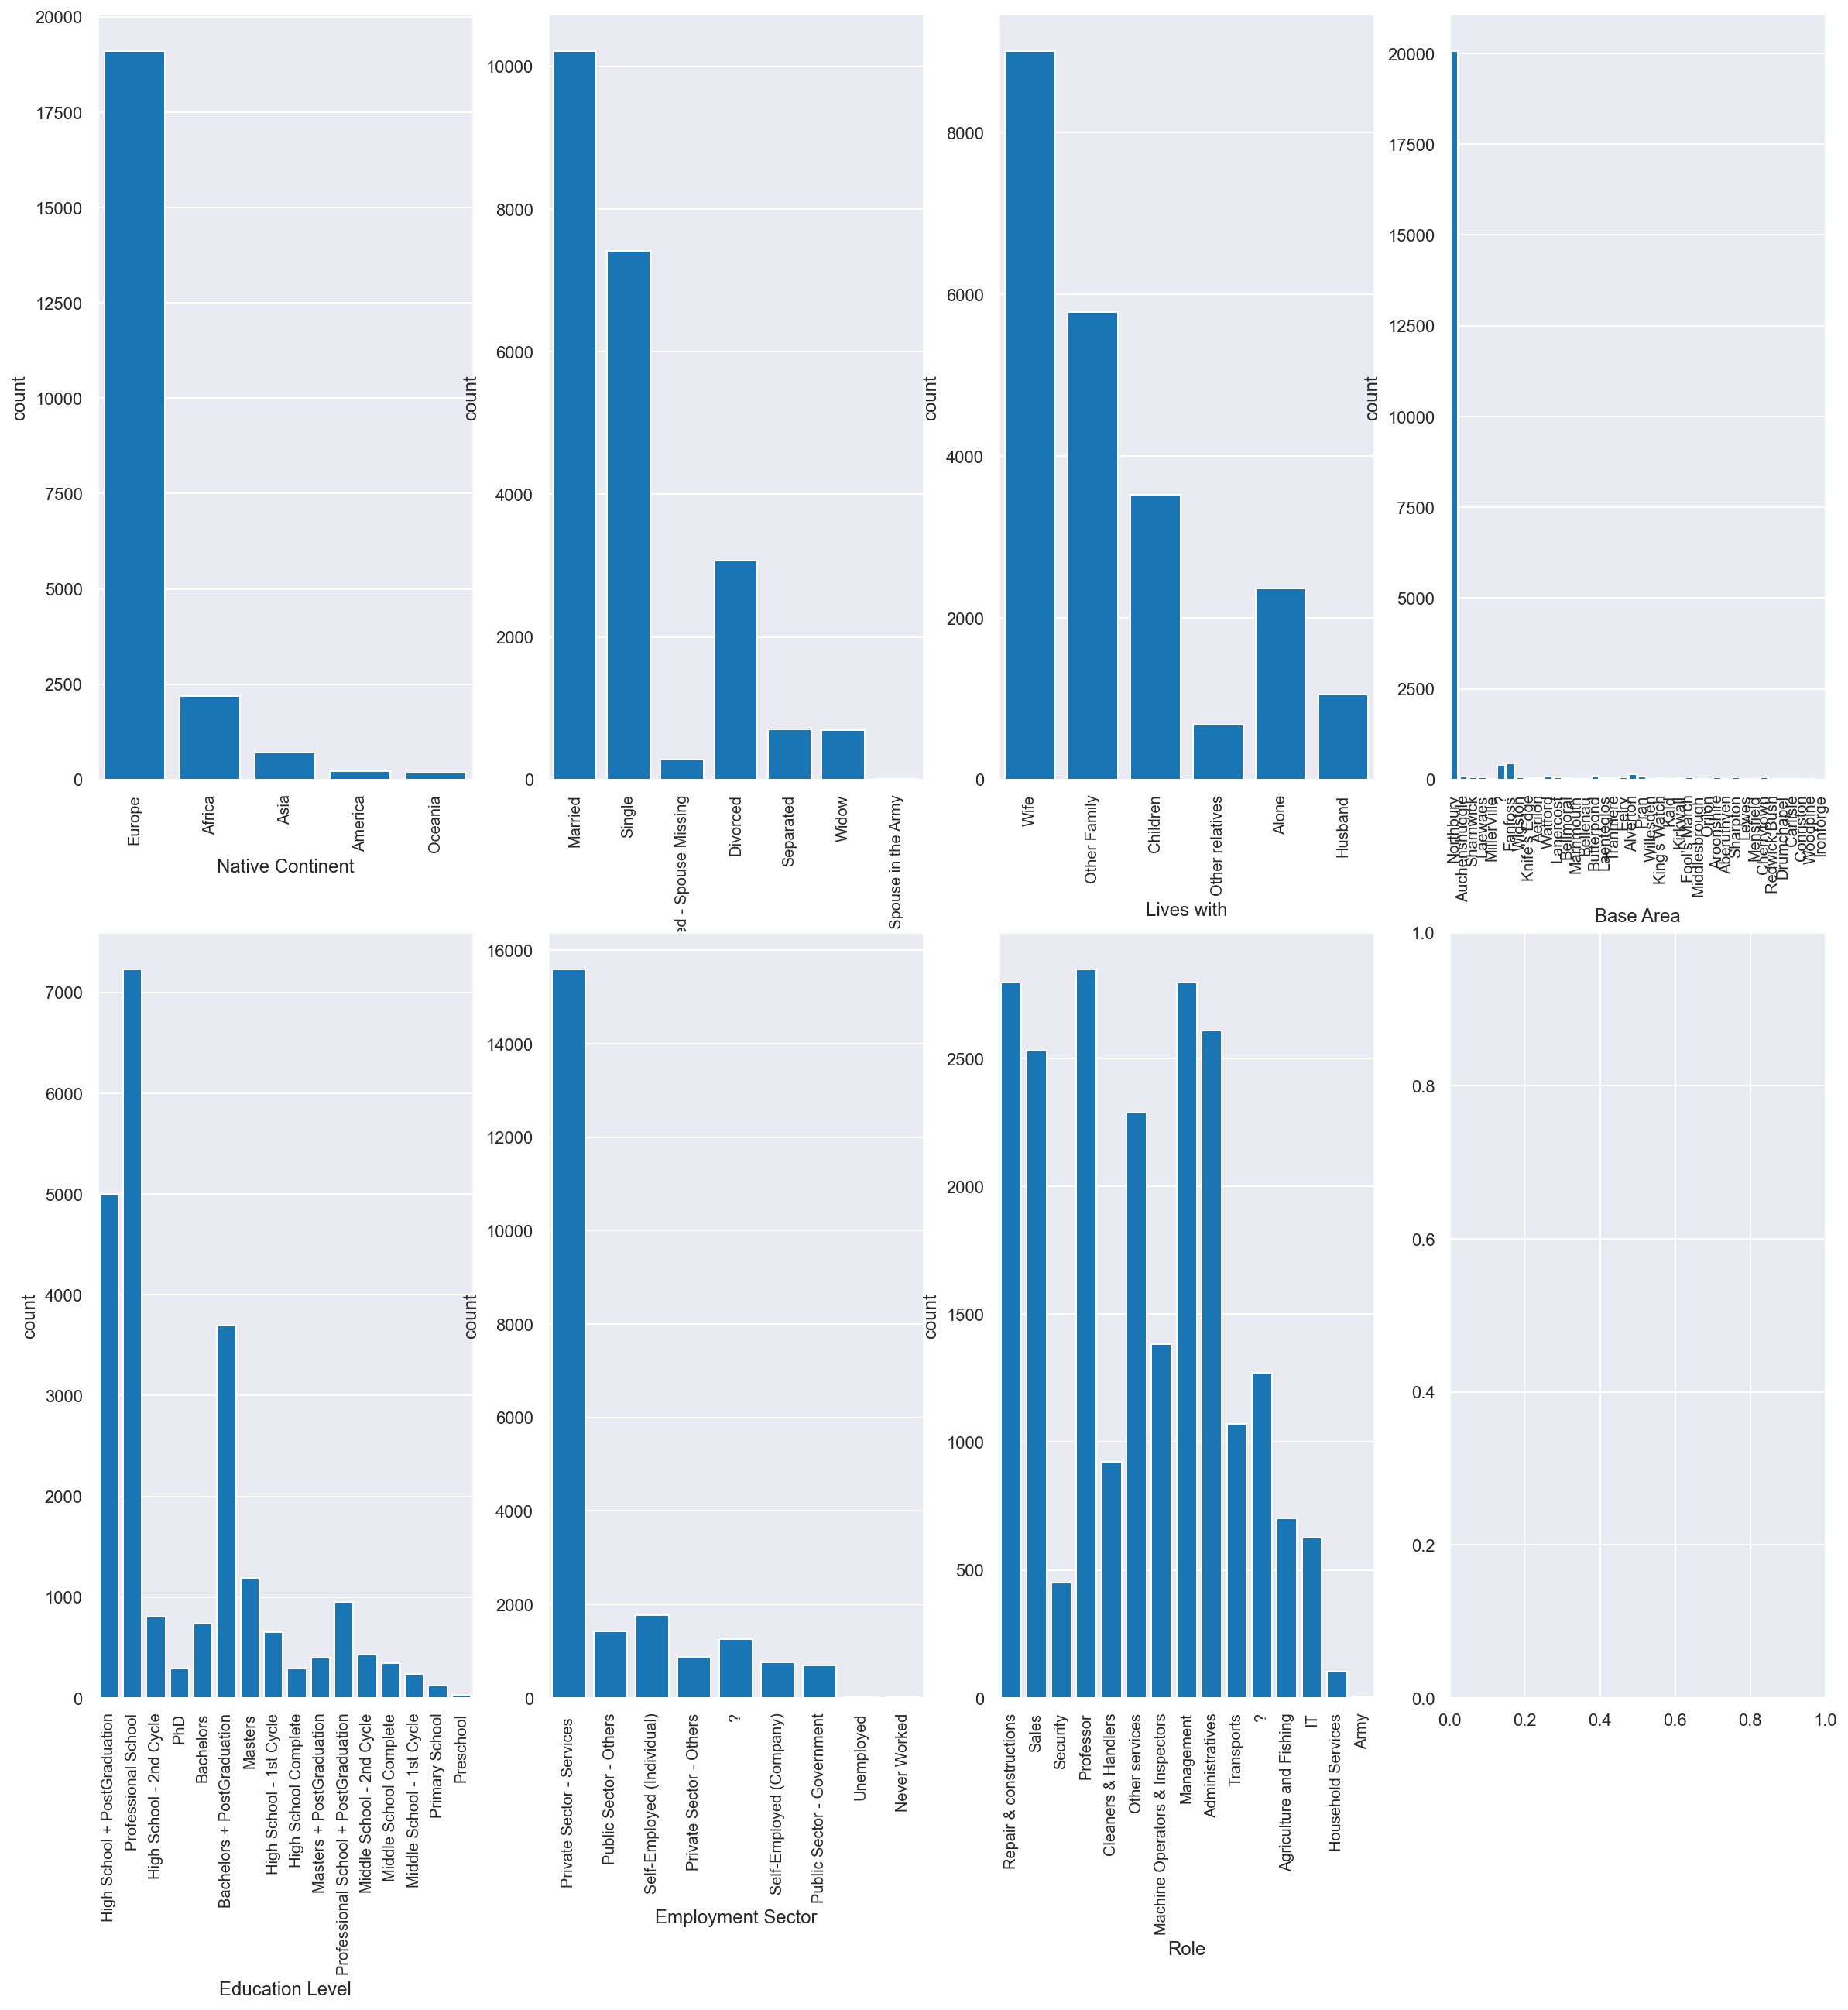

In [20]:
# All Non-Metric Variables' Absolute Frequencies
sns.set()

# Prepare figure. Create individual axes where each bar plot will be placed
fig, axes = plt.subplots(2, ceil(len(non_metric_features) / 2), figsize=(20, 20))

# Plot data
# Iterate across axes objects and associate each bar plot (hint: use the ax argument):
for ax, feat in zip(axes.flatten(), non_metric_features): # Notice the zip() function and flatten() method
    ax = sns.countplot(train_check[feat], ax=ax, color='#007acc')#
    ax.set_xticklabels(ax.get_xticklabels(),rotation=90)
    ax.tick_params(axis='x', labelsize=10)

#title = "Categorical/Low Cardinality Variables' Absolute Frequencies"
#plt.suptitle(title)

plt.show()

### Numerical features

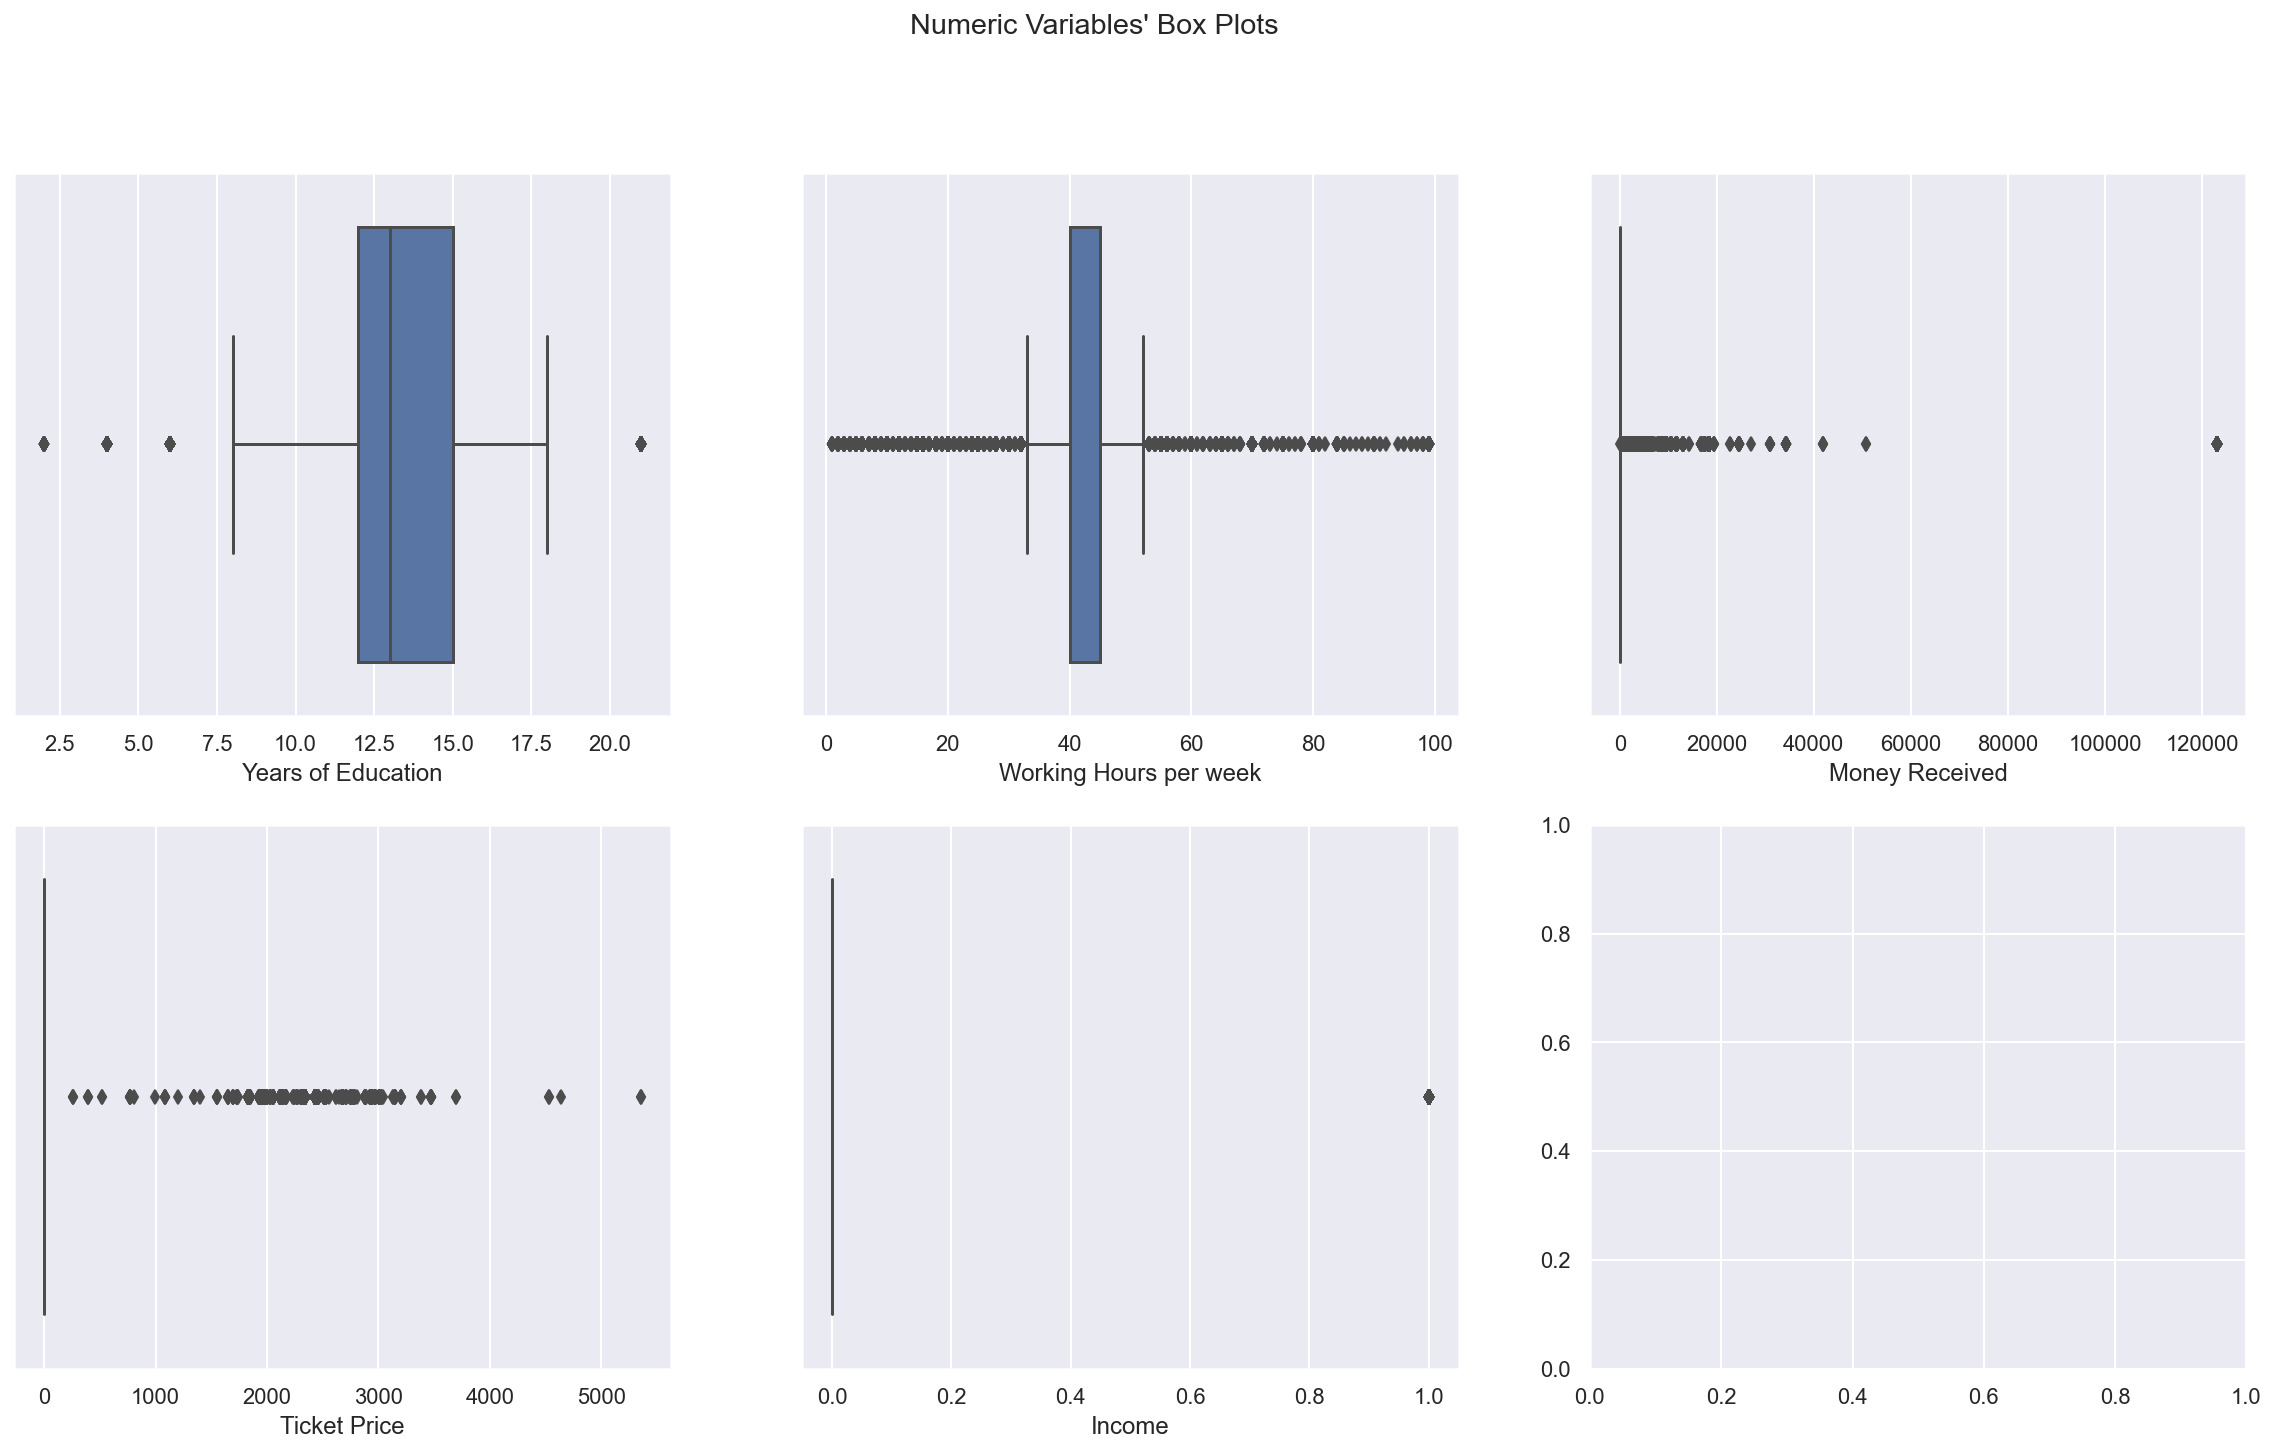

In [21]:
# All Numeric Variables' Box Plots in one figure
sns.set()

# Prepare figure. Create individual axes where each box plot will be placed
fig, axes = plt.subplots(2, ceil(len(metric_features) / 2), figsize=(20, 11))

# Plot data
# Iterate across axes objects and associate each box plot (hint: use the ax argument):
for ax, feat in zip(axes.flatten(), metric_features): # Notice the zip() function and flatten() method
    sns.boxplot(x=train_check[feat], ax=ax)
    
# Layout
# Add a centered title to the figure:
title = "Numeric Variables' Box Plots"

plt.suptitle(title)

plt.show()

In [22]:
# function to create histogram, Q-Q plot and
# boxplot
def diagnostic_plots(df, variable):

    # define figure size
    plt.figure(figsize=(16, 4))

    # histogram
    plt.subplot(1, 3, 1)
    sns.distplot(df[variable], bins=30)
    plt.title('Histogram')

    # Q-Q plot
    plt.subplot(1, 3, 2)
    stats.probplot(df[variable], dist="norm", plot=plt)
    plt.ylabel('Quantiles')

    # boxplot
    plt.subplot(1, 3, 3)
    sns.boxplot(y=df[variable])
    plt.title('Boxplot')

    plt.show()

Text(0.5, 1.0, 'Histogram')

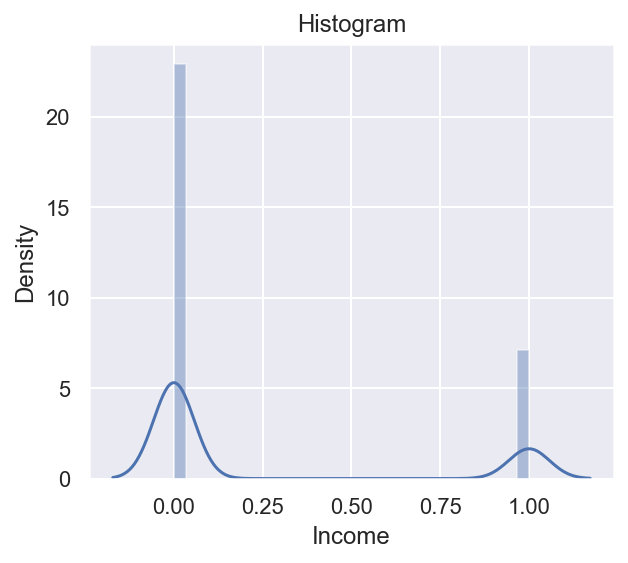

In [23]:
# define figure size
plt.figure(figsize=(16, 4))

# histogram
plt.subplot(1, 3, 1)
sns.distplot(train_check['Income'], bins=30)
plt.title('Histogram')

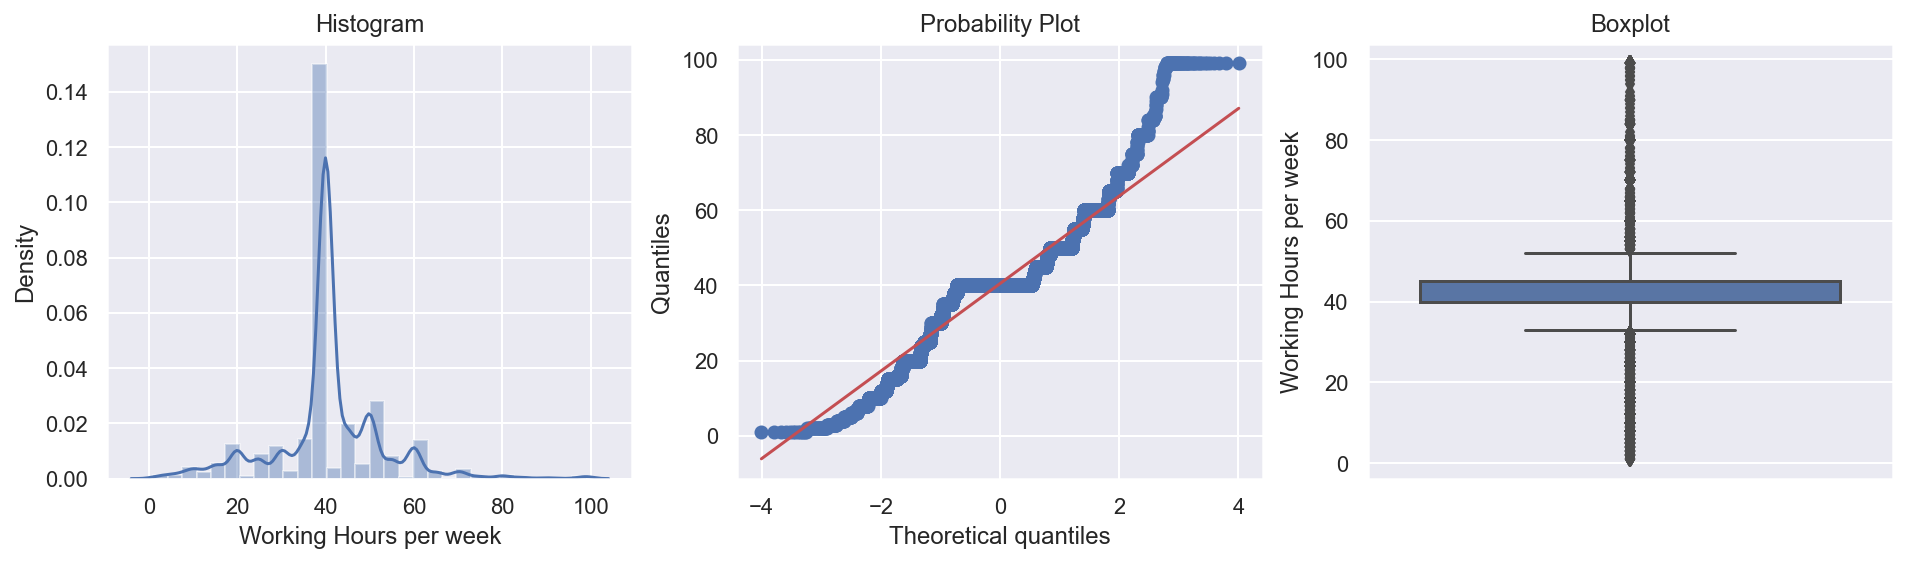

In [24]:
diagnostic_plots(train_check, 'Working Hours per week')

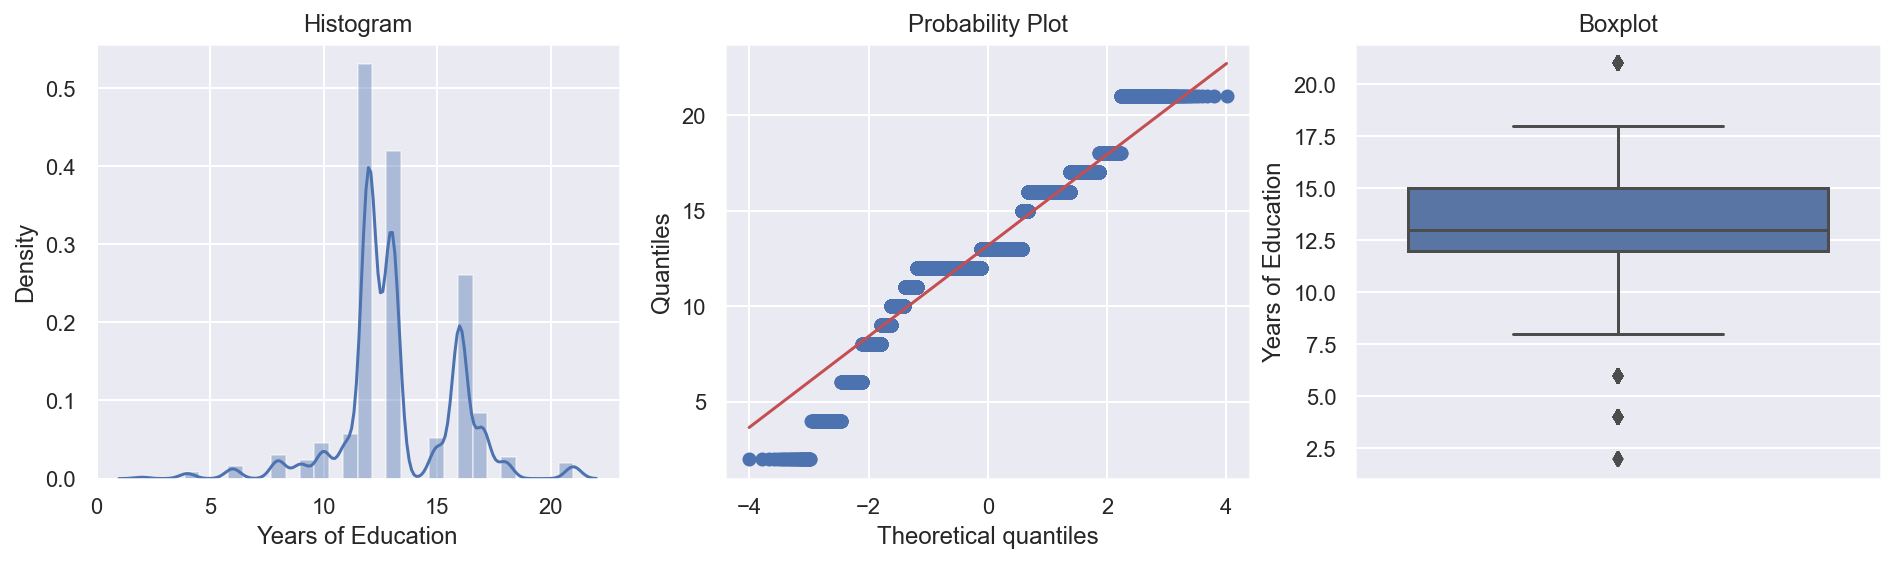

In [25]:
diagnostic_plots(train_check, 'Years of Education')

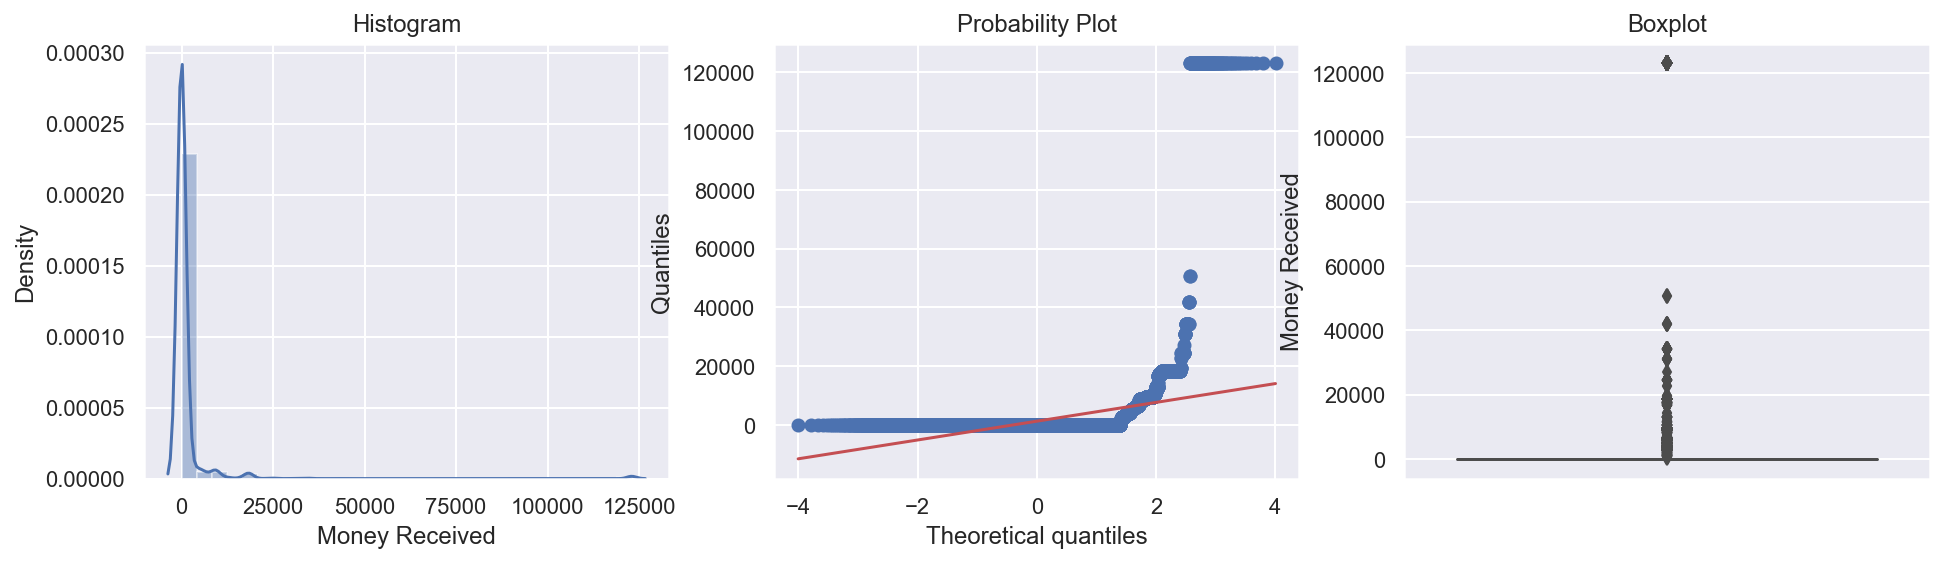

In [26]:
diagnostic_plots(train_check, 'Money Received')

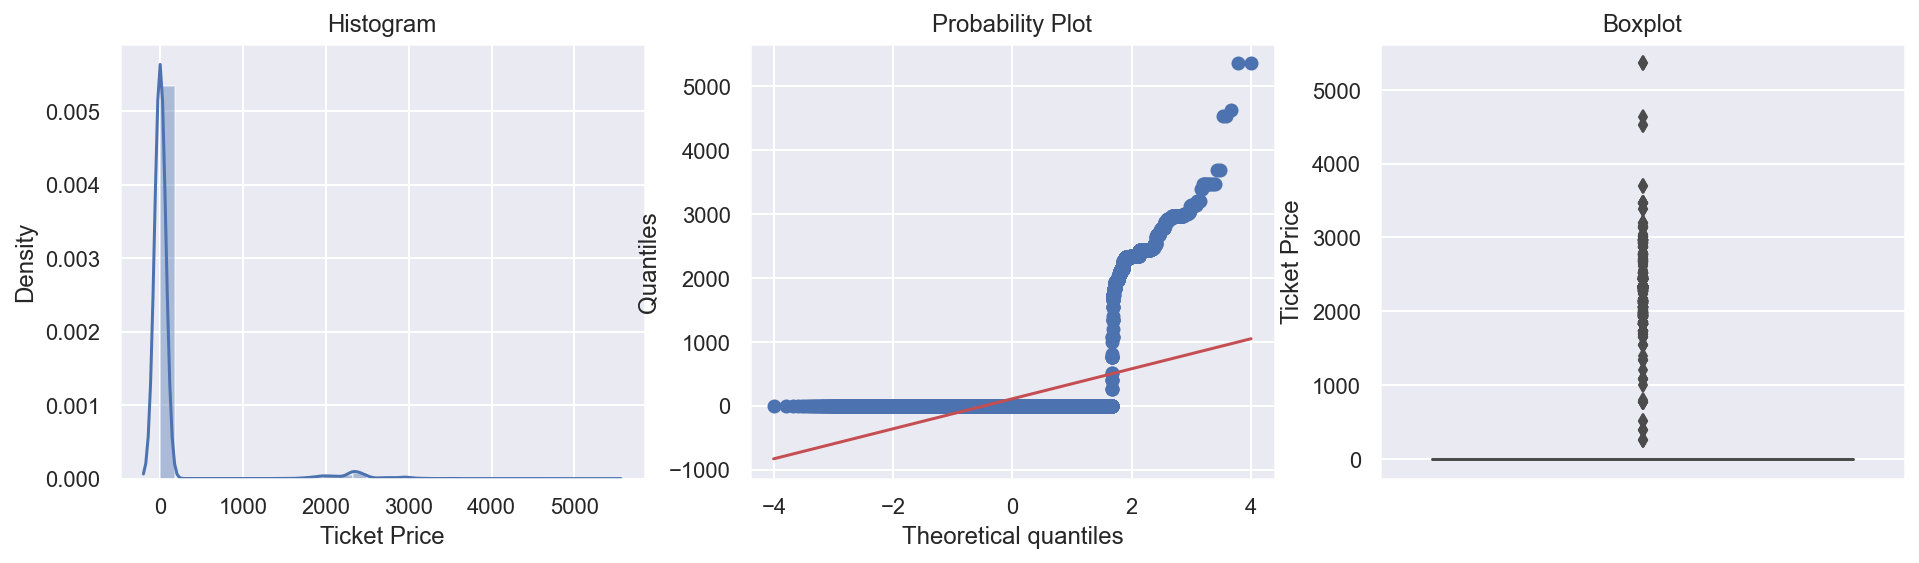

In [27]:
diagnostic_plots(train_check, 'Ticket Price')

In [28]:
# We found out that some columns have the following string '?' , so bellow we check the quantity of '?' string in the variables that have them. 

def checkdf_character(df,char): 
    for i in range(len(df.columns)):
        #Printing the column names, number of rows & percentage of rows from the dataset
        #Further details will be printed in the next lines through the utilization of EDA tools
        size=len(df.loc[df.iloc[:,i].astype(str).str.startswith('?')])
        if size>0:
            print('------------------------------------------')
            print('Column: {}{}Number of Rows: {}{}Percentage: {}%'.format(df.columns[i],'\n',size,'\n',round(size/len(df)*100,2)))

In [29]:
#Data inspection shows that the train dataset has rows with question mark '?' character
checkdf_character(train_check,'?')

------------------------------------------
Column: Base Area
Number of Rows: 395
Percentage: 1.76%
------------------------------------------
Column: Employment Sector
Number of Rows: 1264
Percentage: 5.64%
------------------------------------------
Column: Role
Number of Rows: 1271
Percentage: 5.67%


In [30]:
#Data inspection shows that the test dataset has rows with question mark '?' character
checkdf_character(test,'?')

------------------------------------------
Column: Base Area
Number of Rows: 187
Percentage: 1.85%
------------------------------------------
Column: Employment Sector
Number of Rows: 570
Percentage: 5.64%
------------------------------------------
Column: Role
Number of Rows: 570
Percentage: 5.64%


### Considerations: 

-  Since target variable income is very unbalanced, (how do you fix it? stratify?) 

 
- We can identify outliers in working hours and Education Years, although Education Years outliers make sense, so we should not remove them. 
    - For the Working hours outliers, instead of deleting them we should substitute them with a Measure of Central Tendency.
    

- There are features with '?' string:

    Column: Base Area
    Number of Rows: 395
    Percentage: 1.76%
   
   - For the next two columns most of the '?' values match, when the Employment Sector has '?', Role also has '?'. 
   
    Column: Employment Sector
    Number of Rows: 1264
    Percentage: 5.64%
    
    Column: Role
    Number of Rows: 1271
    Percentage: 5.67%
    
    - The values with '?' should also be substituted. 
    

- Since Birthdate and Name don't give us much info, we can create two variables from them, age and gender. 

- Run anykind of correlation matrix? 


# 4 - Modify the Data / Data Preparation 

# 4.1 Creating two new features from existing variables.

### 4.1.1 - Creating Gender from the variable Name, 0 for male and 1 for female.

In [31]:
train_upd = train.copy()

In [32]:
train_upd.insert(2,'Gender',train_upd['Name'].str.slice(0,4).str.replace('.','').str.replace(' ',''))

In [33]:
train_upd['Gender']=train_upd['Gender'].apply(lambda i: 0 if i=='Mr' else 1)

In [34]:
train_upd.drop('Name',axis=1,inplace=True)

In [35]:
train_upd['Gender'].unique()

array([0, 1], dtype=int64)

### 4.1.2 - Creating Age from the variable Birthday

In [36]:
train_upd.insert(4,'Age',pd.Series([]))
for i,j in enumerate(list(train_upd['Birthday'].values)):
    try:
        train_upd['Age'][i]=np.round((datetime.now()+timedelta(days=10228)-datetime.strptime(j.replace(' ',''),'%B%d,%Y'))/timedelta(days=365.2425))
    except ValueError:
        train_upd['Age'][i]=np.round((datetime.now()+timedelta(days=10228)-datetime.strptime(j.replace(' ','').replace('9','8'),'%B%d,%Y'))/timedelta(days=365.2425))

In [37]:
train_upd['Age']=train_upd['Age'].astype('uint8')

In [38]:
train_upd.drop('Birthday',axis=1,inplace=True)

In [43]:
train_upd.head()

,CITIZEN_ID,Gender,Native Continent,Age,Marital Status,Lives with,Base Area,Education Level,Years of Education,Employment Sector,Role,Working Hours per week,Money Received,Ticket Price,Income
0,12486,0,Europe,45,Married,Wife,Northbury,High School + PostGraduation,13,Private Sector - Services,Repair & constructions,40,0,2273,1
1,12487,0,Europe,43,Married,Wife,Northbury,Professional School,12,Public Sector - Others,Repair & constructions,40,0,0,1
2,12488,0,Europe,40,Married,Wife,Northbury,Professional School,12,Private Sector - Services,Sales,46,0,2321,1
3,12489,0,Europe,64,Married,Wife,Northbury,High School - 2nd Cycle,11,Private Sector - Services,Security,37,5395,0,1
4,12490,0,Europe,34,Single,Other Family,Northbury,PhD,21,Self-Employed (Individual),Professor,45,0,0,1


# 4.2 - Filling the values with '?'

In [44]:
# since we are using IterativeImputer() to fill the '?' string values we need to change them to NaN's so the algorigthm works.

for i in [6,9,10]:
    aIndex=np.array(train_upd[train_upd.iloc[:,i].astype(str).str.startswith('?')].iloc[:,i].index)
    for j in aIndex:
        train_upd.iloc[j,i]=np.nan

train_upd.isna().sum()

CITIZEN_ID                   0
Gender                       0
Native Continent             0
Age                          0
Marital Status               0
Lives with                   0
Base Area                  395
Education Level              0
Years of Education           0
Employment Sector         1264
Role                      1271
Working Hours per week       0
Money Received               0
Ticket Price                 0
Income                       0
dtype: int64

In [46]:
#Creating a data frame with the categorical variables.
#cat_col = train_upd.select_dtypes(include=['object']).columns.values # Because it does encode numeric features like years of education. 
cat_col = train_upd[['Native Continent','Marital Status','Lives with','Base Area','Education Level','Employment Sector','Role']].columns.values
cat_col

array(['Native Continent', 'Marital Status', 'Lives with', 'Base Area',
       'Education Level', 'Employment Sector', 'Role'], dtype=object)

In [47]:
encoder = OrdinalEncoder()

In [48]:
mice = IterativeImputer()

In [49]:
def encode(data):
    reshape = np.array(data.dropna()).reshape(-1,1)
    ordinal = encoder.fit_transform(reshape)
    data.loc[data.notnull()] = np.squeeze(ordinal)
    return data

In [50]:
# Not running for now.
for col in cat_col: 
    encode(train_upd[col])

In [51]:
#Filling NaN according to Mice algorigthm. 
train_upd=pd.DataFrame(np.round(mice.fit_transform(train_upd)),columns=train_upd.columns)

In [54]:
# double check to what was done.
train_upd.isna().sum()

CITIZEN_ID                0
Gender                    0
Native Continent          0
Age                       0
Marital Status            0
Lives with                0
Base Area                 0
Education Level           0
Years of Education        0
Employment Sector         0
Role                      0
Working Hours per week    0
Money Received            0
Ticket Price              0
Income                    0
dtype: int64

In [55]:
train_upd

,CITIZEN_ID,Gender,Native Continent,Age,Marital Status,Lives with,Base Area,Education Level,Years of Education,Employment Sector,Role,Working Hours per week,Money Received,Ticket Price,Income
0,12486.0,0.0,3.0,45.0,1.0,5.0,28.0,2.0,13.0,2.0,10.0,40.0,0.0,2273.0,1.0
1,12487.0,0.0,3.0,43.0,1.0,5.0,28.0,14.0,12.0,4.0,10.0,40.0,0.0,0.0,1.0
2,12488.0,0.0,3.0,40.0,1.0,5.0,28.0,14.0,12.0,2.0,11.0,46.0,0.0,2321.0,1.0
3,12489.0,0.0,3.0,64.0,1.0,5.0,28.0,4.0,11.0,2.0,12.0,37.0,5395.0,0.0,1.0
4,12490.0,0.0,3.0,34.0,5.0,3.0,28.0,11.0,21.0,6.0,9.0,45.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22395,34881.0,1.0,3.0,26.0,0.0,1.0,28.0,14.0,12.0,2.0,3.0,40.0,0.0,0.0,0.0
22396,34882.0,0.0,3.0,24.0,5.0,1.0,28.0,14.0,12.0,2.0,8.0,35.0,0.0,0.0,0.0
22397,34883.0,1.0,3.0,26.0,5.0,3.0,28.0,6.0,17.0,4.0,9.0,40.0,2674.0,0.0,0.0
22398,34884.0,0.0,3.0,37.0,5.0,3.0,28.0,1.0,16.0,2.0,10.0,90.0,0.0,0.0,1.0


# 4.3 Removing the Outliers - Using mahalanobis

In [57]:
#John needs to check. 
main_data = train_upd.copy().reset_index()
main_data['id'] = train.index

In [ ]:
metric_data = main_data.loc[:,(np.array(main_data.dtypes=="float64")) | (np.array(main_data.dtypes=="int64"))]

data = metric_data.set_index("id")

yj = prep.PowerTransformer(method='yeo-johnson')
qt = prep.QuantileTransformer(n_quantiles=500, output_distribution='normal', random_state=np.random.RandomState(104))

X_trans_yj = yj.fit_transform(data)
X_trans_qt = qt.fit_transform(data)

# Merging
X_trans = np.concatenate((X_trans_yj, X_trans_qt), axis=1)

# Creating DataFrame
merge_labels = list(map(lambda x: "yj_" + x, data.columns.to_list()))+list(map(lambda x: "qt_" + x, data.columns.to_list()))
trans_df = pd.DataFrame(X_trans, columns=merge_labels, index=data.index)

In [ ]:
transqt_df = trans_df.loc[:,[i for i in trans_df.columns.to_list() if "qt" in i]]
transyj_df = trans_df.loc[:,[i for i in trans_df.columns.to_list() if "yj" in i]]

In [ ]:
def out_mahalanobis(data, random, contamination=0.03):
    n = data.shape[0]
    df = data.shape[1]
    # Obtain mahalanobis distance of each observation to the center and then sort it
    ee_out = cov.EllipticEnvelope(contamination=0.2, support_fraction=0.95, random_state=np.random.RandomState(304)).fit(data)
    mahalan = ee_out.mahalanobis(data)
    # Obtain chi-square percentiles of each observations
    quantiles = chi2.ppf(q=np.fromfunction(lambda x:(x-0.5)/n, (n,)), df=df)
    # Obtain labels
    labels = ee_out.predict(data)    
    return mahalan, quantiles, labels

In [ ]:
mqt, qqt, lqt = out_mahalanobis(transqt_df, 0)

In [ ]:
myj, qyj, lyj = out_mahalanobis(transyj_df, 0)

In [ ]:
lqt_lyj = pd.DataFrame({'lqt': lqt, 'lyj': lyj})

In [ ]:
# checking outliers precentage
inl = lqt_lyj.loc[(lqt_lyj['lqt'] == 1) & (lqt_lyj['lyj'] == 1)].sum()['lqt']
'Outliers percentage: {:4.2f}%'.format(100 - inl/len(lqt_lyj) * 100)

In [ ]:
# creating mask for outliers' drop
lqt_lyj.loc[(lqt_lyj['lqt'] == 1) & (lqt_lyj['lyj'] == 1), 'mask'] = True
lqt_lyj.fillna(False, inplace=True)
lqt_lyj.drop(columns=['lqt', 'lyj'], inplace=True)

# - With 1 Dataset 

In [479]:
# don't mind this before the saturday meeting.
algo_test = train_upd.copy()

In [480]:
data = algo_test.iloc[:,:-1]
target = algo_test.iloc[:,-1]

In [481]:
data.head()

,CITIZEN_ID,Gender,Native Continent,Age,Marital Status,Lives with,Base Area,Education Level,Years of Education,Employment Sector,Role,Working Hours per week,Money Received,Ticket Price
0,12486.0,0.0,3.0,45.0,1.0,5.0,28.0,2.0,13.0,2.0,10.0,40.0,0.0,2273.0
1,12487.0,0.0,3.0,43.0,1.0,5.0,28.0,14.0,12.0,4.0,10.0,40.0,0.0,0.0
2,12488.0,0.0,3.0,40.0,1.0,5.0,28.0,14.0,12.0,2.0,11.0,46.0,0.0,2321.0
3,12489.0,0.0,3.0,64.0,1.0,5.0,28.0,4.0,11.0,2.0,12.0,37.0,5395.0,0.0
4,12490.0,0.0,3.0,34.0,5.0,3.0,28.0,11.0,21.0,6.0,9.0,45.0,0.0,0.0


Trying Scale

In [427]:
scale_features = algo_test[['Gender','Native Continent','Age','Marital Status','Lives with','Base Area','Education Level','Years of Education','Role','Working Hours per week','Money Received','Ticket Price']].columns.values

In [428]:
scale_features

array(['Gender', 'Native Continent', 'Age', 'Marital Status',
       'Lives with', 'Base Area', 'Education Level', 'Years of Education',
       'Role', 'Working Hours per week', 'Money Received', 'Ticket Price'],
      dtype=object)

In [429]:
scaler = StandardScaler() #Normalizer,MinMaxScaler,RobustScaler,RobustScaler
                                   
scaled_feat = scaler.fit_transform(data[scale_features])
scaled_feat

array([[-0.70443313,  0.36498071,  0.41446356, ..., -0.03910828,
        -0.14358233,  4.32599854],
       [-0.70443313,  0.36498071,  0.2717527 , ..., -0.03910828,
        -0.14358233, -0.21820433],
       [-0.70443313,  0.36498071,  0.05768641, ...,  0.44591089,
        -0.14358233,  4.42196059],
       ...,
       [ 1.41958116,  0.36498071, -0.94128963, ..., -0.03910828,
         0.14620157, -0.21820433],
       [-0.70443313,  0.36498071, -0.15637989, ...,  4.0027181 ,
        -0.14358233, -0.21820433],
       [-0.70443313, -0.72306399, -1.22671136, ..., -0.03910828,
        -0.14358233, -0.21820433]])

In [430]:
data[scale_features] = scaled_feat
data.head()

,CITIZEN_ID,Gender,Native Continent,Age,Marital Status,Lives with,Base Area,Education Level,Years of Education,Employment Sector,Role,Working Hours per week,Money Received,Ticket Price
0,12486.0,-0.704433,0.364981,0.414464,-0.690931,1.023659,0.22513,-0.893700,-0.069210,2.0,0.745843,-0.039108,-0.143582,4.325999
1,12487.0,-0.704433,0.364981,0.271753,-0.690931,1.023659,0.22513,1.188943,-0.467237,4.0,0.745843,-0.039108,-0.143582,-0.218204
2,12488.0,-0.704433,0.364981,0.057686,-0.690931,1.023659,0.22513,1.188943,-0.467237,2.0,1.018492,0.445911,-0.143582,4.421961
3,12489.0,-0.704433,0.364981,1.770217,-0.690931,1.023659,0.22513,-0.546593,-0.865263,2.0,1.291142,-0.281618,0.441079,-0.218204
4,12490.0,-0.704433,0.364981,-0.370446,1.215027,-0.087612,0.22513,0.668282,3.115002,6.0,0.473193,0.365074,-0.143582,-0.218204


Lasso

In [482]:
def plot_importance(coef,name):
    imp_coef = coef.sort_values()
    plt.figure(figsize=(8,10))
    imp_coef.plot(kind = "barh")
    plt.title("Feature importance using " + name + " Model")
    plt.show()

In [483]:
reg = LassoCV()

In [484]:
reg.fit(X=data, y=target)

LassoCV()

In [485]:
print("Best alpha using built-in LassoCV: %f" % reg.alpha_)

Best alpha using built-in LassoCV: 0.869043


In [486]:
print("Best score using built-in LassoCV: %f" %reg.score(X = data,y = target))

Best score using built-in LassoCV: 0.104930


In [487]:
coef = pd.Series(reg.coef_, index = data.columns)

In [488]:
print("Lasso picked " + str(sum(coef != 0)) + " variables and eliminated the other " +  str(sum(coef == 0)) + " variables")

Lasso picked 5 variables and eliminated the other 9 variables


In [489]:
coef.sort_values()

CITIZEN_ID               -1.994292e-07
Gender                   -0.000000e+00
Native Continent          0.000000e+00
Marital Status           -0.000000e+00
Lives with                0.000000e+00
Base Area                 0.000000e+00
Education Level          -0.000000e+00
Years of Education        0.000000e+00
Employment Sector         0.000000e+00
Role                      0.000000e+00
Money Received            1.011914e-05
Ticket Price              1.311337e-04
Working Hours per week    9.072496e-04
Age                       1.729525e-03
dtype: float64

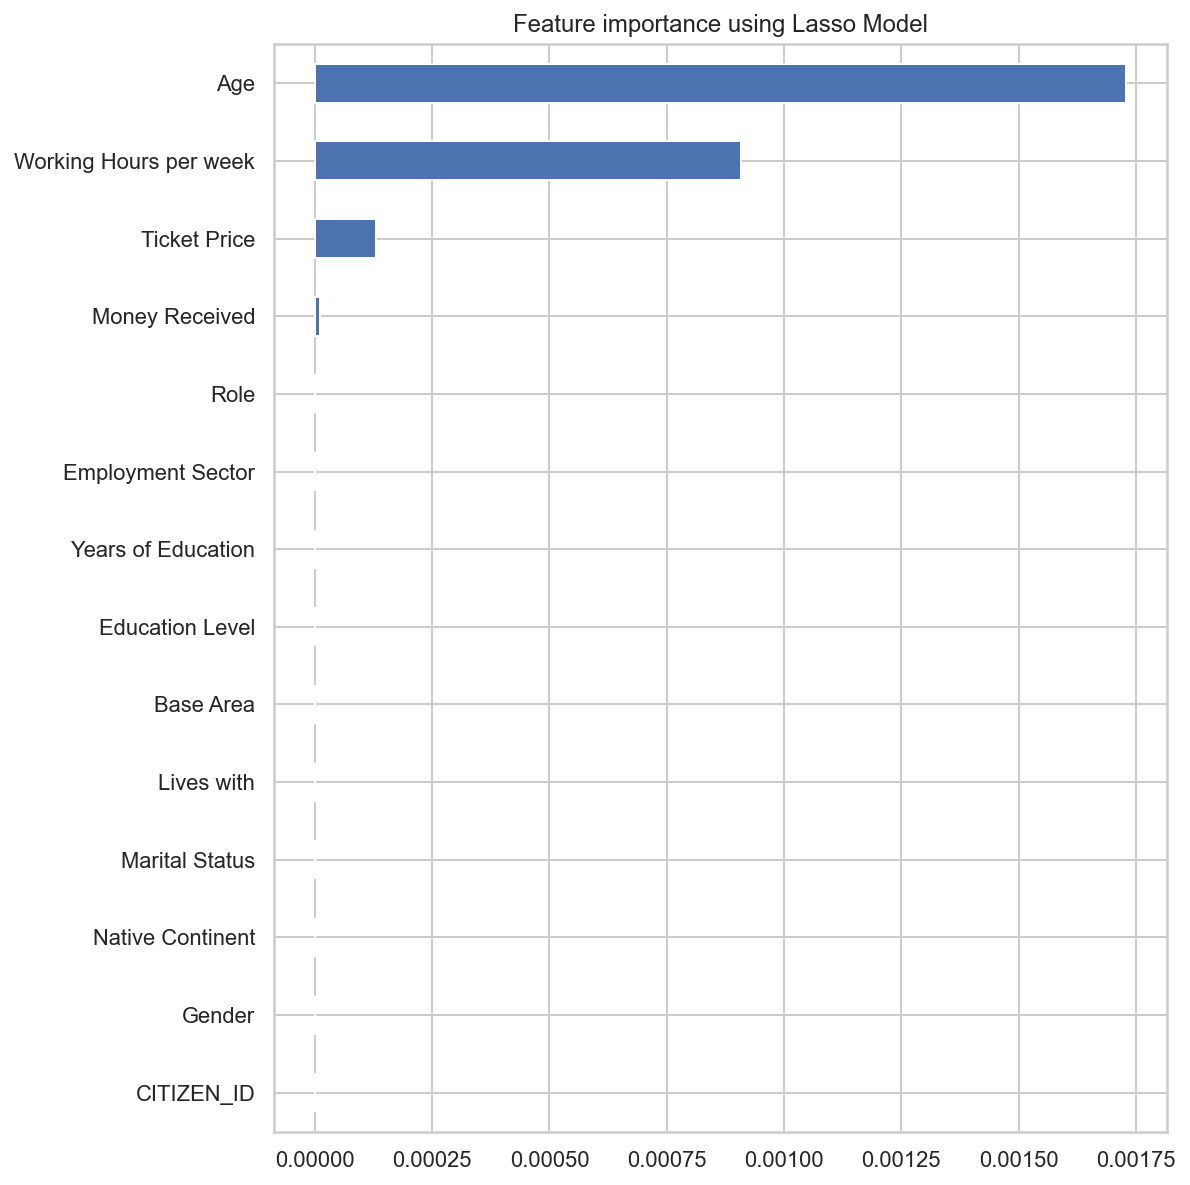

In [490]:
plot_importance(coef,'Lasso')

In [465]:
data.drop(['Base Area','Employment Sector','Education Level','Gender','Marital Status'],axis=1,inplace=True)

In [466]:
data.set_index('CITIZEN_ID',inplace=True)

RFE

In [491]:
model = LinearRegression()

In [492]:
rfe = RFE(estimator = model, n_features_to_select = 5)

In [493]:
X_rfe = rfe.fit_transform(X = data, y = target) 

In [494]:
model.fit(X = X_rfe,y = target)

LinearRegression()

In [495]:
rfe.support_

array([False,  True,  True, False,  True,  True, False, False,  True,
       False, False, False, False, False])

In [496]:
rfe.ranking_

array([10,  1,  1,  3,  1,  1,  7,  6,  1,  5,  2,  4,  9,  8])

In [497]:
selected_features = pd.Series(rfe.support_, index = data.columns)
selected_features

CITIZEN_ID                False
Gender                     True
Native Continent           True
Age                       False
Marital Status             True
Lives with                 True
Base Area                 False
Education Level           False
Years of Education         True
Employment Sector         False
Role                      False
Working Hours per week    False
Money Received            False
Ticket Price              False
dtype: bool

Logistic

In [499]:
data.drop(['Ticket Price','Money Received','Gender','Age','Base Area','Role','Education Level','Employment Sector','Working Hours per week'],axis=1,inplace=True)

In [498]:
#'Ticket Price','Money Received','Base Area','Age'

In [500]:
data.set_index('CITIZEN_ID',inplace=True)

In [501]:
data

,Native Continent,Marital Status,Lives with,Years of Education
CITIZEN_ID,,,,
12486.0,3.0,1.0,5.0,13.0
12487.0,3.0,1.0,5.0,12.0
12488.0,3.0,1.0,5.0,12.0
12489.0,3.0,1.0,5.0,11.0
12490.0,3.0,5.0,3.0,21.0
...,...,...,...,...
34881.0,3.0,0.0,1.0,12.0
34882.0,3.0,5.0,1.0,12.0
34883.0,3.0,5.0,3.0,17.0


### Logistic model

In [502]:
# dividing Volunteers dataset into train and validation. 
X_train, X_val, y_train, y_val = train_test_split(data,target, test_size=0.2, random_state=0, stratify=target) 

In [503]:
log_model = LogisticRegression()

In [504]:
log_model.fit(X_train,y_train)

LogisticRegression()

In [505]:
y_pred = log_model.predict(X_val)
#y_pred

In [506]:
pred_prob = log_model.predict_proba(X_val)
#pred_prob

In [507]:
log_model.coef_

array([[ 0.0970032 , -0.34645015,  0.44284328,  0.37009368]])

In [508]:
cm = confusion_matrix(y_val, y_pred)
cm

array([[3163,  255],
       [ 627,  435]], dtype=int64)

In [509]:
accuracy = accuracy_score(y_val, y_pred)
accuracy

0.803125

In [510]:
precision = precision_score(y_val, y_pred)
precision

0.6304347826086957

In [511]:
recall_score(y_val, y_pred)

0.4096045197740113

In [512]:
f1 = f1_score(y_val, y_pred)
f1

0.49657534246575347

In [478]:
print('Results on the validation set:')
print(
    
    classification_report(y_true = y_val, y_pred = y_pred)
)

Results on the validation set:
              precision    recall  f1-score   support

         0.0       0.81      0.96      0.88      3418
         1.0       0.67      0.27      0.39      1062

    accuracy                           0.80      4480
   macro avg       0.74      0.62      0.63      4480
weighted avg       0.78      0.80      0.76      4480



In [ ]:
r2_score(y_val, y_pred)

In [ ]:
r2 = r2_score(y_val, y_pred)
n = len(y_val)
p = len(X_train.columns)

def adj_r2 (r2,n,p):
    return 1-(1-r2)*(n-1)/(n-p-1)

adj_r2(r2,n,p)

# 4.4 - Divinding the data in 3 different data sets - because we have 3 distinct groups, Volunteers, Essencial and ticket buyers. 

In [43]:
train_upd = train_upd.astype(int)

In [166]:
#train_upd.head()

In [58]:
train_upd_a=train_upd[(train_upd['Ticket Price']==0) & (train_upd['Money Received']==0)].copy() #Volunteers
train_upd_b=train_upd[train_upd['Money Received']>0].copy()#received money
train_upd_c=train_upd[train_upd['Ticket Price']>0].copy()#buying entry

In [ ]:
# DO NOT RUN, It's here fow now, just for reference.
#group a
#df1=train_upd_a.copy()
#for c in cat_col:
    #encode(df1[c])

In [ ]:
## DO NOT RUN, It's here fow now, just for reference.
#group b
#df2=train_upd_b.copy()
#for c in cat_col:
    #encode(df2[c])

In [ ]:
# DO NOT RUN, It's here fow now, just for reference.
#group c
#df3=train_upd_c.copy()
#for c in cat_col:
    #encode(df3[c])

# 4.5 - RFE - Recursive Feature Selection

In [46]:
# We should choose one of the methods, or RFE or Ridge or Lasso. We could try lasso regression, it's more accurate and easier to understand. 

In [59]:
def rfe_group(df):
    data = df.iloc[:,:-1]
    target = df.iloc[:,-1]
    nof_list=np.arange(1,len(data.columns)+1)  
    high_score=0
    nof=0           
    score_list =[]
    #dividing the data sets into train and validation. 
    for n in range(len(nof_list)):
        X_train, X_test, y_train, y_test = train_test_split(data,target, test_size = 0.2, random_state = 0,stratify = target)
        
        #Selecting the model for the Feature selection.
        model = LogisticRegression()
        rfe = RFE(model,nof_list[n])
        X_train_rfe = rfe.fit_transform(X_train,y_train)
        X_test_rfe = rfe.transform(X_test)
        model.fit(X_train_rfe,y_train)

        score = model.score(X_test_rfe,y_test)
        score_list.append(score)

        if(score>high_score):
            high_score = score
            nof = nof_list[n]
    print("Optimum number of features: %d" %nof)
    print('\n')
    print("Score with %d features: %f" % (nof, high_score))
    rfe = RFE(estimator = model, n_features_to_select = nof)
    X_rfe = rfe.fit_transform(X = data, y = target)
    model = LogisticRegression().fit(X = X_rfe,y = target)
    selected_features = pd.Series(rfe.support_, index = data.columns)
    print(selected_features)
    ridge = RidgeClassifierCV().fit(X = data,y = target)
    coef_ridge = pd.Series(ridge.coef_[0], index = data.columns)
    return coef_ridge

In [50]:
#Ploting the features importance with ridge regression. 
def plot_importance(coef,name):
    imp_coef = coef.sort_values()
    plt.figure(figsize=(8,10))
    imp_coef.plot(kind = "barh")
    plt.title("Feature importance using " + name)
    plt.show()

In [165]:
coef_ridge_1 = rfe_group(algo_test)
#plot_importance(coef_ridge_1,'Group A -> Volunteers - No Payment')

Optimum number of features: 2


Score with 2 features: 0.810045
CITIZEN_ID                False
Gender                    False
Native Continent          False
Age                       False
Marital Status            False
Lives with                 True
Base Area                 False
Education Level           False
Years of Education         True
Employment Sector         False
Role                      False
Working Hours per week    False
Money Received            False
Ticket Price              False
dtype: bool


In [61]:
# Selecting the Features for the Volunteers dataset.
train_upd_a.drop(['Gender','Age','Base Area','Education Level','Employment Sector','Role','Working Hours per week','Ticket Price','Money Received'],axis=1,inplace=True)

In [62]:
train_upd_a.set_index('CITIZEN_ID',inplace=True) # Check later and after making changes if ID is still correct. 

In [64]:
#train_upd_a

In [167]:
coef_ridge_2 = rfe_group(train_upd_b)
#plot_importance(coef_ridge_2,'Group B -> Were invited (Money Received)')

In [82]:
# Selecting the Features for the essencials dataset.
train_upd_b.drop(['Ticket Price','Money Received','Base Area','Age'],axis=1,inplace=True) # We are letting Education lvl stay since it's has some weight. 

In [83]:
train_upd_b.set_index('CITIZEN_ID',inplace=True) # Check later and after making changes if ID is still correct. 

In [ ]:
#train_upd_b

In [ ]:
coef_ridge_3 = rfe_group(train_upd_c)
#plot_importance(coef_ridge_3,'Group C -> Money offering - Ticket Price')

In [ ]:
# Selecting the Features for the essencials dataset.
train_upd_c.drop(['Birthday','Ticket Price','Money Received','Name','Base Area','Age','Role','Education Level'],axis=1,inplace=True) # We are letting Education lvl stay since it's has some weight. 

In [ ]:
train_upd_c.set_index('CITIZEN_ID',inplace=True) # Check later and after making changes if ID is still correct. 

In [ ]:
#train_upd_c

# 5 - Modeling - Create a predictive model

## 5.1 Running logistic regression

### 5.1.1 Dataset Volunteers

In [65]:
#Spliting train and validation data
 # Volunteers dataset
data_1 = train_upd_a.iloc[:,:-1]
target_a = train_upd_a.iloc[:,-1]

In [66]:
# dividing Volunteers dataset into train and validation. 
X_train, X_val, y_train, y_val = train_test_split(data_1,target_a, test_size=0.2, random_state=0, stratify=target_a)  

In [67]:
log_model = LogisticRegression()

In [68]:
log_model.fit(X_train,y_train)

LogisticRegression()

In [69]:
y_pred = log_model.predict(X_val)
#y_pred

In [70]:
pred_prob = log_model.predict_proba(X_val)
#pred_prob

In [71]:
log_model.coef_

array([[ 0.09965103, -0.34807912,  0.46253341,  0.34309525]])

In [72]:
cm = confusion_matrix(y_val, y_pred)
cm

array([[3021,  152],
       [ 476,  254]], dtype=int64)

The confusion matrix in sklearn is presented in the following format: <br>
[ [ TN  FP  ] <br>
    [ FN  TP ] ]

In [73]:
accuracy = accuracy_score(y_val, y_pred)
accuracy

0.8390981296438637

In [74]:
precision = precision_score(y_val, y_pred)
precision

0.625615763546798

In [75]:
recall_score(y_val, y_pred)

0.34794520547945207

In [76]:
f1 = f1_score(y_val, y_pred)
f1

0.4471830985915493

In [77]:
print('Results on the validation set:')
print(
    
    classification_report(y_true = y_val, y_pred = y_pred)
)

Results on the validation set:
              precision    recall  f1-score   support

           0       0.86      0.95      0.91      3173
           1       0.63      0.35      0.45       730

    accuracy                           0.84      3903
   macro avg       0.74      0.65      0.68      3903
weighted avg       0.82      0.84      0.82      3903



### Model Performance measures

In [ ]:
# Not sure R2 and Adjusted R2 are the best algorithms to check logistic regression. 

<a class="anchor" id="rsquare">
    
###  $R^{2}$ Score

</a>

__When to use?__ <br>
When we want to measure the amount of variance in the target variable that can be explained by our model. <br>
It gives the degree of variability in the target variable that is explained by the model or the independent variables. <br>
If this value is 0.7, then it means that the independent variables explain 70% of the variation in the target variable. <br>

__Definition:__ <br>
R^2 (coefficient of determination) regression score function.

__Interpretation:__ <br>
Best possible score is 1.0 and it can be negative (because the model can be arbitrarily worse). 

__Parameters:__ <br>
_y_true_: Ground truth (correct) target values; <br>
_y_pred_: Estimated target values; <br>


In [78]:
r2_score(y_val, y_pred)
#when we want to measure variance in target value.
#when you apply R2 score to different number of variables the R2 score changes,
# not good to compare. We can use Adjusted R score.

-0.058193922177274704

<a class="anchor" id="adjusted">
    
### 1.2. Adjusted $R^{2}$ Score

</a>

There is no direct way to obtain the adjusted R^2 using sklearn, but we can apply the formula:
<img src="adj_r2.png" alt="Drawing" style="width: 300px;"/> <br>


where n stands for the sample size and p for the number of the regressors.

In [79]:
r2_score(y_val, y_pred)

r2 = r2_score(y_val, y_pred)
n = len(y_val)
p = len(X_train.columns)

def adj_r2 (r2,n,p):
    return 1-(1-r2)*(n-1)/(n-p-1)

adj_r2(r2,n,p)

-0.059279806140514646

### 5.1.2 Dataset Essencials

In [84]:
#Essencials dataset
train_b = train_upd_b.iloc[:,:-1]
target_b = train_upd_b.iloc[:,-1]

In [85]:
# dividing Essencial dataset into train and validation. 
X_train, X_val, y_train, y_val = train_test_split(train_b,target_b, test_size=0.2, random_state=0, stratify=target_b) 

In [86]:
log_model = LogisticRegression()

In [87]:
log_model.fit(X_train,y_train)

LogisticRegression()

In [88]:
y_pred = log_model.predict(X_val)
#y_pred

In [89]:
pred_prob = log_model.predict_proba(X_val)
#pred_prob

In [90]:
log_model.coef_

array([[ 0.09441625, -0.12114098, -0.21561218,  0.27930565,  0.01267111,
         0.37421784, -0.00417339,  0.03369465,  0.03152648]])

In [91]:
cm = confusion_matrix(y_val, y_pred)
cm

array([[ 75,  67],
       [ 33, 192]], dtype=int64)

In [92]:
accuracy = accuracy_score(y_val, y_pred)
accuracy

0.7275204359673024

In [93]:
precision = precision_score(y_val, y_pred)
precision

0.7413127413127413

In [94]:
recall_score(y_val, y_pred)

0.8533333333333334

In [95]:
f1 = f1_score(y_val, y_pred)
f1

0.7933884297520661

In [ ]:
print('Results on the validation set:')
print(
    # write your code in here
    classification_report(y_true = y_val, y_pred = y_pred)
)

### Performance measures

In [96]:
r2_score(y_val, y_pred)
#when we want to measure variance in target value.
#when you apply R2 score to different number of variables the R2 score changes,
# not good to compare. We can use Adjusted R score.

-0.14866979655712065

### 5.1.2 Dataset Ticket Buyers

In [180]:
#Ticket buyers
train_c = train_upd_c.iloc[:,:-1]
target_c = train_upd_c.iloc[:,-1]

NameError: name 'train_upd_c' is not defined

In [ ]:
# dividing Essencial dataset into train and validation. 
X_train, X_val, y_train, y_val = train_test_split(train_c,target_c, test_size=0.2, random_state=0, stratify=target_c) 

In [ ]:
log_model = LogisticRegression()

In [ ]:
log_model.fit(X_train,y_train)

In [ ]:
y_pred = log_model.predict(X_val)
#y_pred

In [ ]:
pred_prob = log_model.predict_proba(X_val)
#pred_prob

In [ ]:
log_model.coef_

In [ ]:
cm = confusion_matrix(y_val, y_pred)
cm

In [ ]:
accuracy = accuracy_score(y_val, y_pred)
accuracy

In [ ]:
precision = precision_score(y_val, y_pred)
precision

In [ ]:
recall_score(y_val, y_pred)

In [ ]:
f1 = f1_score(y_val, y_pred)
f1

In [ ]:
print('Results on the validation set:')
print(
    # write your code in here
    classification_report(y_true = y_val, y_pred = y_pred)
)

### Performance measures

# 4.3 Testing Data

# 5) Applying ML techniques

# 6) Training

# 7) Evaluation / Assessment

# 8) Testing across the ML algos tested above

# 9) Adding to the analysis other ML algos

# 10) Optimization

# 11) Conclussion